/home/vagrant/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:75: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/home/vagrant/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:79: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/home/vagrant/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:83: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/home/vagrant/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:87: FutureWarning: from_

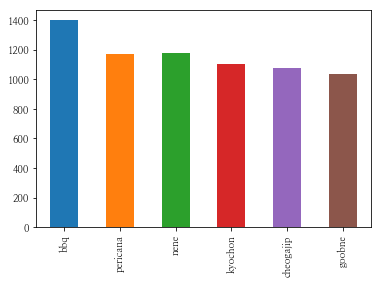

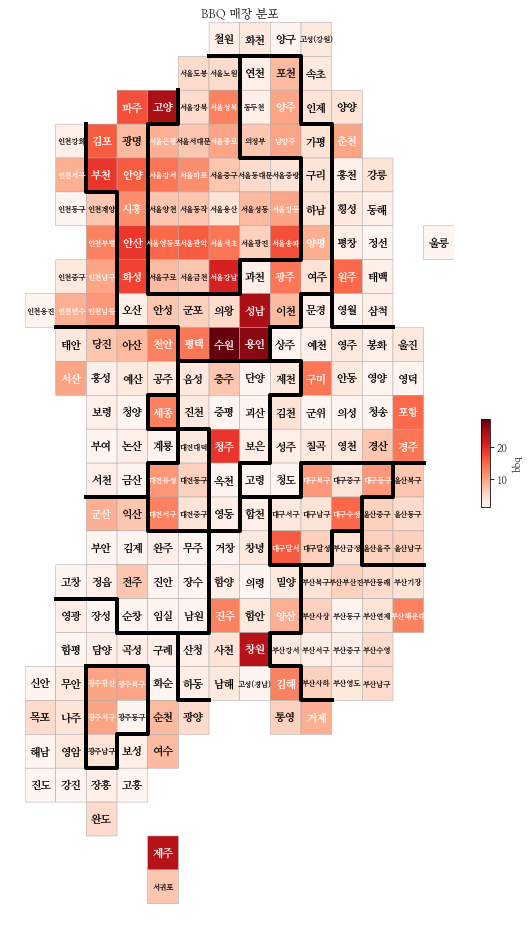

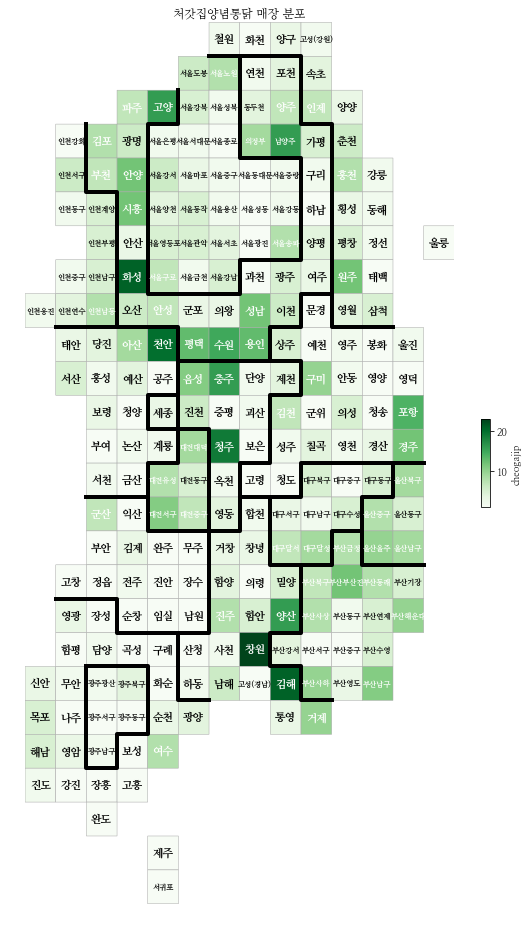

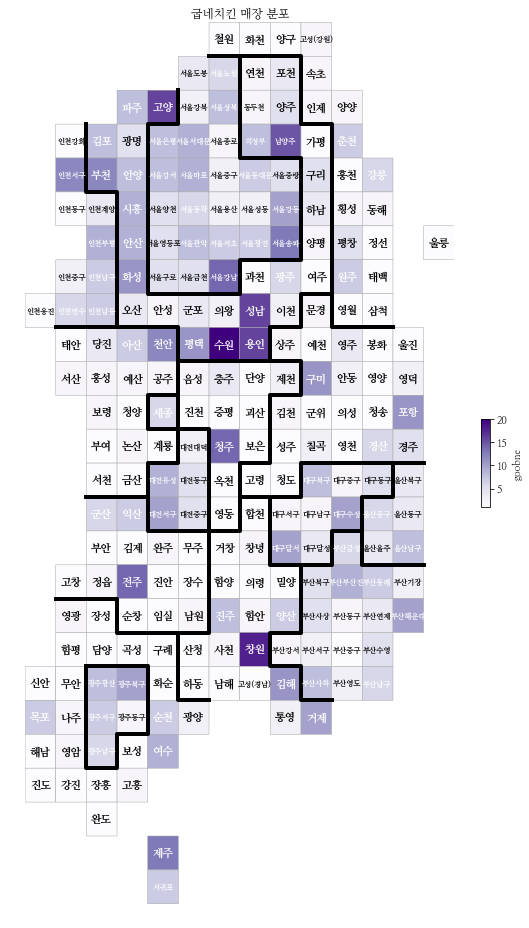

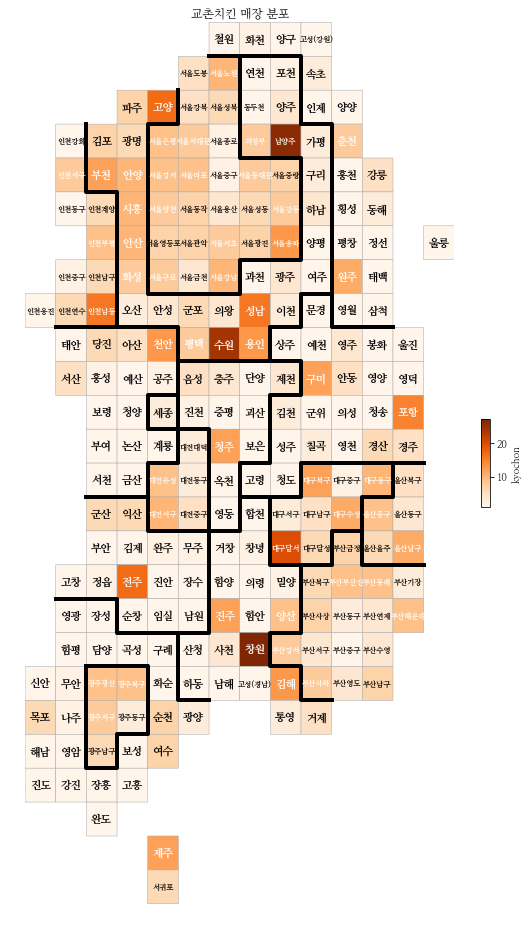

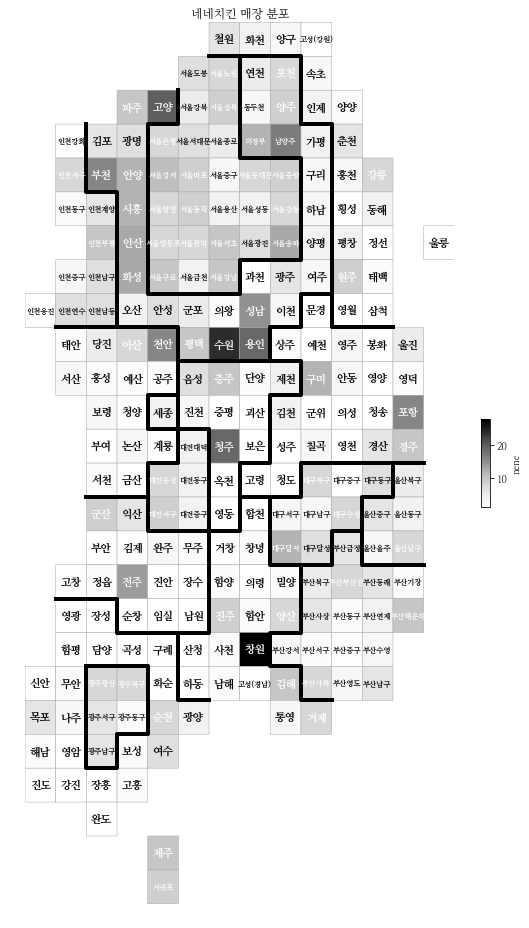

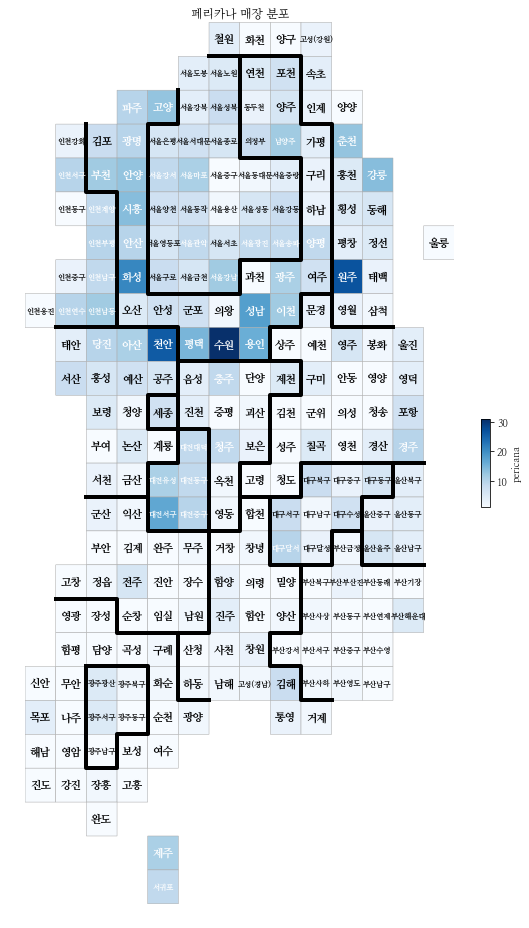

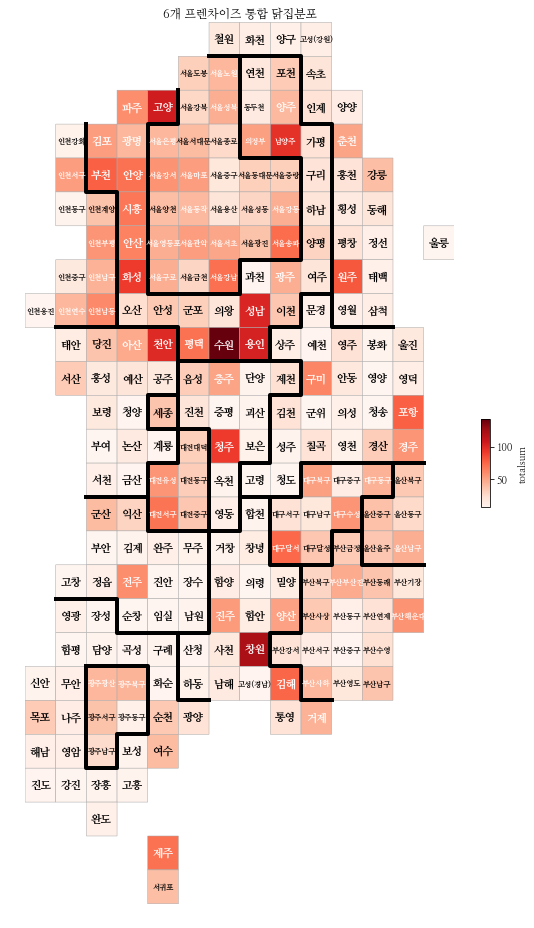

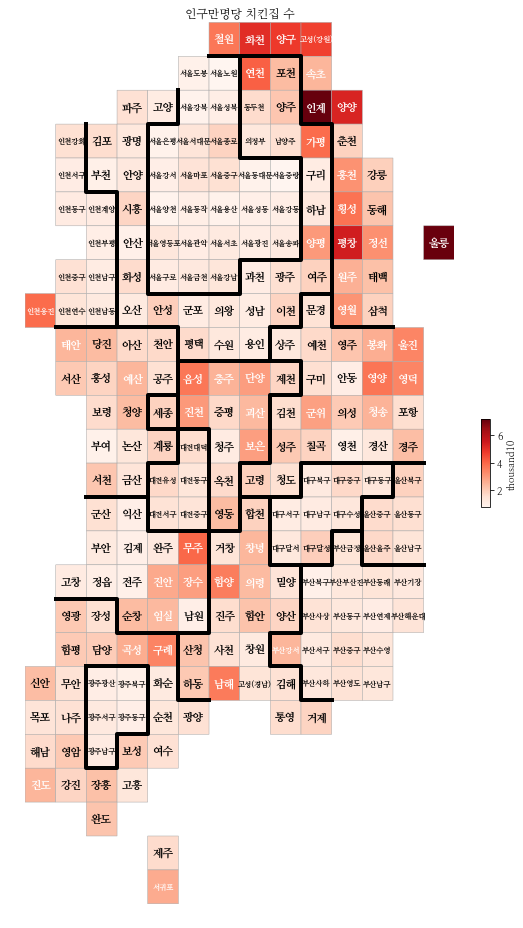

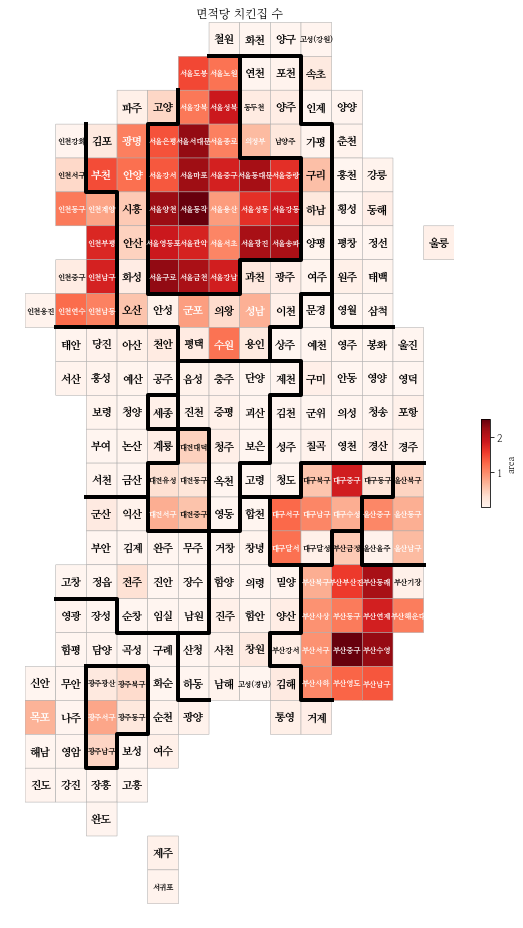

In [2]:
import pandas as pd
from numpy import nan
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
from matplotlib import font_manager, rc


def showMap(blockedMap, targetData, strTitle, strColor, gamma):

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    cmapname = strColor
    plt.figure(figsize=(8, 13))
    plt.title(strTitle)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        dispname = row['shortName']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 7.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(targetData)
    plt.tight_layout()

    plt.savefig('./chicken_data/' + targetData + '.png')

    plt.show()



bbq_table = pd.DataFrame.from_csv('./chicken_data/bbq_modify.csv', encoding='utf-8', index_col=0, header=0)
bbq = bbq_table.apply(lambda r: r['sido'] + " " + r['gungu'], axis=1).value_counts()
bbq.head()

pericana_table = pd.DataFrame.from_csv('./chicken_data/pericana_modify.csv', encoding='utf-8', index_col=0, header=0)
pericana = pericana_table.apply(lambda r: r['sido'] + " " + r['gungu'], axis=1).value_counts()
pericana.head()

nene_table = pd.DataFrame.from_csv('./chicken_data/nene_modify.csv', encoding='utf-8', index_col=0, header=0)
nene = nene_table.apply(lambda r: r['sido'] + " " + r['gungu'], axis=1).value_counts()
nene.head()

kyochon_table = pd.DataFrame.from_csv('./chicken_data/kyochon_modify.csv', encoding='utf-8', index_col=0, header=0)
kyochon = kyochon_table.apply(lambda r: r['sido'] + " " + r['gungu'], axis=1).value_counts()
kyochon.head()

cheogajip_table = pd.DataFrame.from_csv('./chicken_data/cheogajip_modify.csv', encoding='utf-8', index_col=0, header=0)
cheogajip = cheogajip_table.apply(lambda r: r['sido'] + " " + r['gungu'], axis=1).value_counts()
cheogajip.head()

goobne_table = pd.DataFrame.from_csv('./chicken_data/goobne_modify.csv', encoding='utf-8', index_col=0, header=0)
goobne = goobne_table.apply(lambda r: r['sido'] + " " + r['gungu'], axis=1).value_counts()
goobne.head()

chicken_table = pd.DataFrame({'bbq': bbq, 'pericana': pericana, 'nene': nene, 'kyochon': kyochon, 'cheogajip': cheogajip, 'goobne': goobne}).fillna(0)
chicken_table.head()

plt.figure()

chicken_table.sum(axis=0).iloc[:6].plot(kind='bar')
plt.savefig('./chicken_data/total_size.png')
plt.show()

data_draw_korea = pd.read_csv('./data_draw_korea.csv', index_col=0, encoding='UTF-8')
data_draw_korea.index = data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis=1)
data_draw_korea.head()

chicken = pd.merge(data_draw_korea, chicken_table, how='outer', left_index=True, right_index=True)
chicken = chicken[~np.isnan(chicken['면적'])].fillna(0)
chicken['total'] = chicken_table.sum(axis=1)
chicken.head()

font_name = font_manager.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf').get_name()
rc('font', family=font_name)

#프렌차이즈별 닭집분포
showMap(chicken, 'bbq', 'BBQ 매장 분포', 'Reds', 0.75)
showMap(chicken, 'cheogajip', '처갓집양념통닭 매장 분포', 'Greens', 0.75)
showMap(chicken, 'goobne', '굽네치킨 매장 분포', 'Purples', 0.75)
showMap(chicken, 'kyochon', '교촌치킨 매장 분포', 'Oranges', 0.75)
showMap(chicken, 'nene', '네네치킨 매장 분포', 'Greys', 0.75)
showMap(chicken, 'pericana', '페리카나 매장 분포', 'Blues', 0.75)


# (문제2) 6개 프렌차이즈 통합 닭집분포
chicken['totalsum'] = chicken['total']
showMap(chicken, 'totalsum', '6개 프렌차이즈 통합 닭집분포', 'Reds', 0.75)

# (문제3) 인구만명당 치킨집 수
chicken['thousand10'] = chicken['total']/chicken['인구수'] * 10000 
showMap(chicken, 'thousand10', '인구만명당 치킨집 수', 'Reds', 0.75)


# (문제4) 면적당 치킨집 수
chicken['area'] = chicken['total'] /chicken['면적']
showMap(chicken, 'area', '면적당 치킨집 수', 'Reds', 0.75)
